On va implémenter un neurone artificiel. 

On part d'un Dataset de 100 lignes et de 3 colonnes : 2 variables et une colonne de classification (0 ou 1)

In [57]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimensions de X: (100, 2)
dimensions de y: (100, 1)


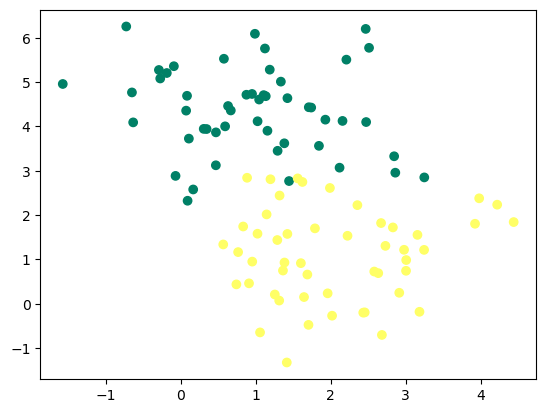

In [58]:
X, y =  make_blobs(n_samples=100, n_features=2, centers=2 , random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()


In [59]:
def init(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return(W,b)

In [60]:
def model(X,W,b): 
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return(A)

In [61]:
def log_loss(A,y):
    return(1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1-A)))

In [62]:
def gradients(A, X, y): 
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return(dW, db)

In [63]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return(W,b)

In [64]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A)
    return A >= 0.5

In [65]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    W,b = init(X)
    
    Loss = []
    
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        
    y_pred = predict(X, W, b)
    print(accuracy_score(y,y_pred))
    
    plt.plot(Loss)
    plt.show()
    
    return(W, b)
    

[[0.92991135]
 [0.80287683]
 [0.01087993]
 [0.21528599]
 [0.94028914]
 [0.373517  ]
 [0.09016546]
 [0.9015542 ]
 [0.06989285]
 [0.87897713]
 [0.04602644]
 [0.87107238]
 [0.0329697 ]
 [0.03121593]
 [0.7139566 ]
 [0.96070383]
 [0.98463069]
 [0.05787266]
 [0.78156303]
 [0.67471604]
 [0.05720447]
 [0.05248005]
 [0.42767361]
 [0.01036996]
 [0.93448385]
 [0.04424484]
 [0.89840009]
 [0.01206333]
 [0.07649917]
 [0.70813051]
 [0.97047461]
 [0.05709788]
 [0.71746376]
 [0.97079742]
 [0.41768536]
 [0.21745072]
 [0.79370097]
 [0.53645333]
 [0.44658268]
 [0.54306538]
 [0.1164338 ]
 [0.06420559]
 [0.00212581]
 [0.18773301]
 [0.24836501]
 [0.8157882 ]
 [0.96019852]
 [0.95733926]
 [0.01069702]
 [0.01483278]
 [0.93097465]
 [0.63056148]
 [0.04047417]
 [0.04923253]
 [0.7409795 ]
 [0.05453615]
 [0.64228331]
 [0.82677543]
 [0.92483284]
 [0.98587804]
 [0.6702151 ]
 [0.17945131]
 [0.0096376 ]
 [0.8992875 ]
 [0.01914152]
 [0.38371979]
 [0.06050718]
 [0.54584685]
 [0.9106972 ]
 [0.27263593]
 [0.20265722]
 [0.91

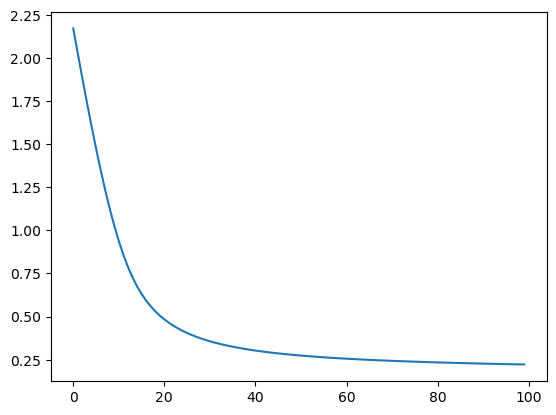

In [66]:
W , b=artificial_neuron(X,y)

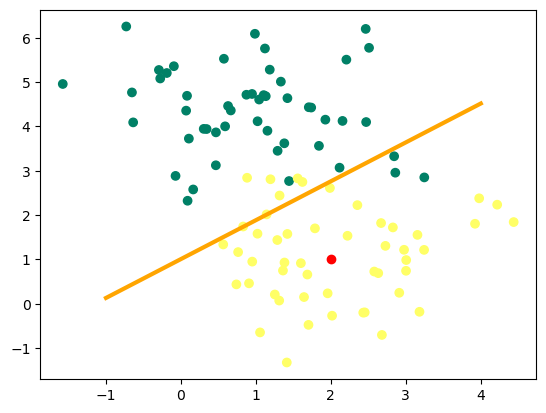

[0.86309022]


array([ True])

In [67]:
x1 = np.linspace(-1, 4, 100)
x2 = (-W[0] * x1 - b)/W[1]

plt.plot(x1, x2, c='orange', lw = 3) 

new_plant = np.array([2,1])
plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.show()
predict(new_plant, W, b)